In [1]:
import pandas as pd
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
# read the dataset
print('reading the dataset')
cols = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 
        'acceleration', 'model year', 'origin', 'car name']
df = pd.read_csv('auto-mpg.data', sep='\s+', header=None, names=cols)

reading the dataset


In [3]:
# convert horsepower column to float and drop rows where horsepower = nan
print('preprocessing')
df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')
df.dropna(axis=0, how='any', inplace=True)

preprocessing


In [10]:
df['mpg_bin'] = pd.qcut(df['mpg'], q=5)
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,mpg_bin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu,"(16.0, 20.0]"
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320,"(8.999, 16.0]"
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite,"(16.0, 20.0]"
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst,"(8.999, 16.0]"
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino,"(16.0, 20.0]"


<AxesSubplot:xlabel='cylinders', ylabel='mpg_bin'>

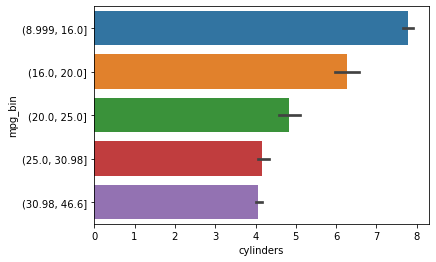

In [26]:
sns.barplot(y=df['mpg_bin'], x=df['cylinders'])

In [27]:
for col in df.columns:
    print(f"sns.barplot(x=df['mpg_bin'], y=df['{col}'])")

sns.barplot(x=df['mpg_bin'], y=df['mpg'])
sns.barplot(x=df['mpg_bin'], y=df['cylinders'])
sns.barplot(x=df['mpg_bin'], y=df['displacement'])
sns.barplot(x=df['mpg_bin'], y=df['horsepower'])
sns.barplot(x=df['mpg_bin'], y=df['weight'])
sns.barplot(x=df['mpg_bin'], y=df['acceleration'])
sns.barplot(x=df['mpg_bin'], y=df['model year'])
sns.barplot(x=df['mpg_bin'], y=df['origin'])
sns.barplot(x=df['mpg_bin'], y=df['car name'])
sns.barplot(x=df['mpg_bin'], y=df['mpg_bin'])


<AxesSubplot:xlabel='mpg_bin', ylabel='displacement'>

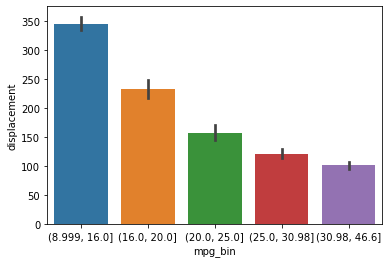

In [14]:
sns.barplot(x=df['mpg_bin'], y=df['displacement'])

<AxesSubplot:xlabel='mpg_bin', ylabel='horsepower'>

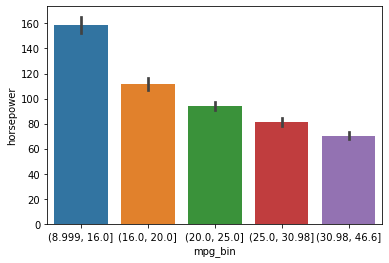

In [15]:
sns.barplot(x=df['mpg_bin'], y=df['horsepower'])

<AxesSubplot:xlabel='mpg_bin', ylabel='weight'>

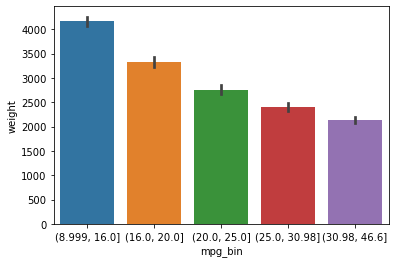

In [16]:
sns.barplot(x=df['mpg_bin'], y=df['weight'])

<AxesSubplot:xlabel='mpg_bin', ylabel='acceleration'>

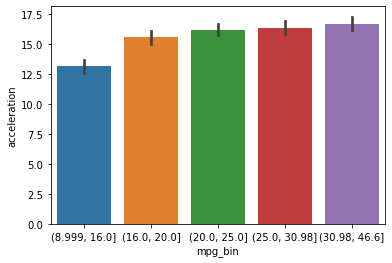

In [17]:
sns.barplot(x=df['mpg_bin'], y=df['acceleration'])

<AxesSubplot:xlabel='origin', ylabel='mpg'>

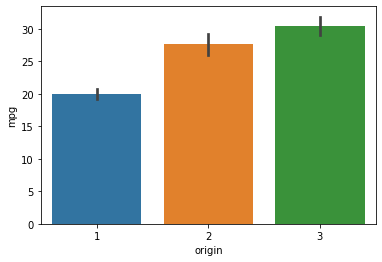

In [32]:
sns.barplot(x=df['origin'], y=df['mpg'])

In [60]:
usa = df[df['origin']==1]['mpg']
usa.count(), usa.min(), usa.max()

(245, 9.0, 39.0)

In [59]:
eu = df[df['origin']==2]['mpg']
eu.count(), eu.min(), eu.max()

(68, 16.2, 44.3)

In [58]:
jp = df[df['origin']==3]['mpg']
jp.count(), jp.min(), jp.max()

(79, 18.0, 46.6)

In [4]:
# segregate features and target columns
print('segregate features and target columns')
X = df.drop(['mpg', 'car name'], axis=1)
y = df['mpg']

segregate features and target columns


In [5]:
# split data into training and test datasets
print('split data into training and test datasets')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

split data into training and test datasets


((313, 7), (79, 7), (313,), (79,))

In [6]:
# create and fit a linear regression model with the training data
print('create and fit an ML model with the training data')
lr_model = LinearRegression()
lr_model = lr_model.fit(X_train, y_train)

create and fit an ML model with the training data


In [7]:
# obtain predictions from the model
print('obtain predictions from the model')
preds = lr_model.predict(X_test)
preds = [round(x, 2) for x in preds]

obtain predictions from the model


In [8]:
# compare actual and predicted values
print('compare actual and predicted values')
comp = pd.DataFrame()
comp['actual'] = y_test
comp['predicted'] = preds
comp['err'] = abs(comp['actual'] - comp['predicted'])
comp['pct_err'] = round(comp['err'] / comp['actual'], 2)
mean_err = round(comp['pct_err'].mean(), 2)

compare actual and predicted values


In [9]:
accuracy = 1.0 - mean_err
print(f'mean error: {mean_err}, accuracy: {accuracy}')

mean error: 0.1, accuracy: 0.9
